In [12]:
import os, sys
path = os.chdir(os.getcwd()+"/..")
print(path)
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!


import numpy as np
import pandas as pd
from Ensembler.src import integrator as integ
import Ensembler.src.system as system
import Ensembler.src.potentials.OneD as pot
# Ensembler.src.Ensembler as cvb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colorbar
%matplotlib inline

None


In [13]:
integrator = integ.metropolisMonteCarloIntegrator()
sys=[system.perturbedSystem(lam=0.0, potential=pot.pertHarmonicOsc(fc=5.0, alpha=0.0, gamma=5.0), integrator=integrator), 
     system.perturbedSystem(lam=1.0, potential=pot.pertHarmonicOsc(fc=5.0, alpha=0.0, gamma=5.0), integrator=integrator)]


Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1
STATES ARE BIIG
[-1.50667736]
[[-1.50667736]]
Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1
STATES ARE BIIG
[2.53472107]
[[2.53472107]]


In [17]:
traj=[]
for s in sys:
    s.set_position(0.0)
    s.simulate(10000, withdrawTraj=True)
    
    t= s.getTrajectory()
    t.position = np.array(t.position.values.tolist()).flatten()
    t.dhdlam =  pd.Series(s.potential.dhdlam(np.array(t.position.values.tolist()).flatten()))
    traj.append(t)


0.0
[[-1.50667736]]
Progress: 	0%	10%	20%	30%	40%	50%	60%	70%	80%	90%	100%
0.0
[[2.53472107]]
Progress: 	0%	10%	20%	30%	40%	50%	60%	70%	80%	90%	100%


In [18]:
traj[0].head()

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity,lam,dhdlam
0,-1.506677,298.0,5.675192,5.675192,NaN,-0.190791,[-2.1649533726393178],0.0,0.0
1,-0.841548,298.0,1.770506,1.770506,NaN,0.665130,None,0.0,0.0
2,-1.204817,298.0,3.628963,3.628963,NaN,-0.363270,None,0.0,0.0
3,-1.564710,298.0,6.120790,6.120790,NaN,-0.359892,None,0.0,0.0
4,-0.804974,298.0,1.619958,1.619958,NaN,0.759736,None,0.0,0.0


No handles with labels found to put in legend.


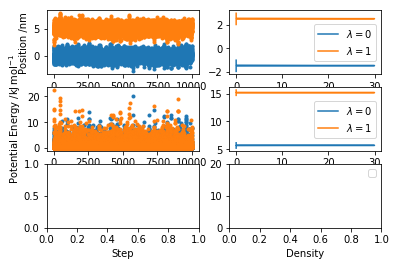

In [19]:
%matplotlib inline
fig, ax=plt.subplots(3, 2)
labels=['Position /nm', 'Potential Energy /$\mathrm{kJ}\, \mathrm{mol}^{-1}$', '$ \partial \mathcal{H} \
/ \partial \lambda  \, / \mathrm{kJ} \, \mathrm{mol}^{-1}$']
for s in range(2):
    hist=[]
    for i, j in enumerate(['position', 'totPotEnergy', ]): #'dhdlam']):
        hist.append(np.histogram(traj[s][j][0], bins=30, density=1))
        ax[i,0].plot(traj[s].index, traj[s][j],'.', label='$\lambda={:d}$'.format(s))
        ax[i,0].set_ylabel(labels[i])
        ax[i,1].plot(hist[i][0], hist[i][1][:-1]+(hist[i][1][1]-hist[i][1][0])/2.0,label='$\lambda={:d}$'.format(s))
        ax[i,1].legend()
ax[2,0].set_xlabel('Step')
ax[2,1].set_xlabel('Density')
ax[2,1].set_ylim(0,20)
ax[2,1].legend()